In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


In [21]:
df=pd.read_csv('cars.csv')

In [22]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [23]:
df.shape

(205, 15)

In [24]:
df.duplicated().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [26]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [27]:
#df['normalized-losses'].unique()
df.apply(lambda col:col.unique())

symboling                                         [3, 1, 2, 0, -1, -2]
normalized-losses    [?, 164, 158, 192, 188, 121, 98, 81, 118, 148,...
make                 [alfa-romero, audi, bmw, chevrolet, dodge, hon...
fuel-type                                                [gas, diesel]
body-style             [convertible, hatchback, sedan, wagon, hardtop]
drive-wheels                                           [rwd, fwd, 4wd]
engine-location                                          [front, rear]
width                [64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64....
height               [48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52.0, 53....
engine-type                   [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]
engine-size          [130, 152, 109, 136, 131, 108, 164, 209, 61, 9...
horsepower           [111, 154, 102, 115, 110, 140, 160, 101, 121, ...
city-mpg             [21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 3...
highway-mpg          [27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 3...
price 

In [28]:
#handle normalized-losses column
df['normalized-losses']=df['normalized-losses'].replace('?',np.nan)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [30]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [31]:
df.apply(lambda col:col.unique())

symboling                                         [3, 1, 2, 0, -1, -2]
normalized-losses    [nan, 164, 158, 192, 188, 121, 98, 81, 118, 14...
make                 [alfa-romero, audi, bmw, chevrolet, dodge, hon...
fuel-type                                                [gas, diesel]
body-style             [convertible, hatchback, sedan, wagon, hardtop]
drive-wheels                                           [rwd, fwd, 4wd]
engine-location                                          [front, rear]
width                [64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64....
height               [48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52.0, 53....
engine-type                   [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]
engine-size          [130, 152, 109, 136, 131, 108, 164, 209, 61, 9...
horsepower           [111, 154, 102, 115, 110, 140, 160, 101, 121, ...
city-mpg             [21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 3...
highway-mpg          [27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 3...
price 

In [32]:
df['normalized-losses']=df['normalized-losses'].astype(float)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 24.2+ KB


In [34]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,35.442168,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,150.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [35]:
mean_normal=df['normalized-losses'].mean()
df['normalized-losses'].fillna(mean_normal,inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 24.2+ KB


In [37]:
df.apply(lambda col:col.unique())

symboling                                         [3, 1, 2, 0, -1, -2]
normalized-losses    [122.0, 164.0, 158.0, 192.0, 188.0, 121.0, 98....
make                 [alfa-romero, audi, bmw, chevrolet, dodge, hon...
fuel-type                                                [gas, diesel]
body-style             [convertible, hatchback, sedan, wagon, hardtop]
drive-wheels                                           [rwd, fwd, 4wd]
engine-location                                          [front, rear]
width                [64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64....
height               [48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52.0, 53....
engine-type                   [dohc, ohcv, ohc, l, rotor, ohcf, dohcv]
engine-size          [130, 152, 109, 136, 131, 108, 164, 209, 61, 9...
horsepower           [111, 154, 102, 115, 110, 140, 160, 101, 121, ...
city-mpg             [21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 3...
highway-mpg          [27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 3...
price 

In [92]:
df['horsepower'].value_counts()

68.0     19
69.0     10
70.0     10
116.0     8
110.0     8
95.0      7
114.0     6
160.0     6
62.0      6
88.0      6
76.0      5
97.0      5
82.0      5
84.0      5
101.0     5
102.0     5
92.0      4
111.0     4
123.0     4
86.0      4
207.0     3
121.0     3
73.0      3
90.0      3
85.0      3
182.0     3
152.0     3
184.0     2
56.0      2
112.0     2
52.0      2
155.0     2
100.0     2
162.0     2
176.0     2
94.0      2
78.0      1
140.0     1
115.0     1
134.0     1
288.0     1
200.0     1
143.0     1
142.0     1
48.0      1
58.0      1
55.0      1
60.0      1
145.0     1
175.0     1
154.0     1
72.0      1
120.0     1
64.0      1
135.0     1
262.0     1
106.0     1
Name: horsepower, dtype: int64

In [39]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [40]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [41]:
df.dropna(inplace=True)

In [42]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [43]:
df['horsepower']=df['horsepower'].astype('float')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    float64
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   body-style         203 non-null    object 
 5   drive-wheels       203 non-null    object 
 6   engine-location    203 non-null    object 
 7   width              203 non-null    float64
 8   height             203 non-null    float64
 9   engine-type        203 non-null    object 
 10  engine-size        203 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           203 non-null    int64  
 13  highway-mpg        203 non-null    int64  
 14  price              203 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 25.4+ KB


# finding outliers and drop or impute them

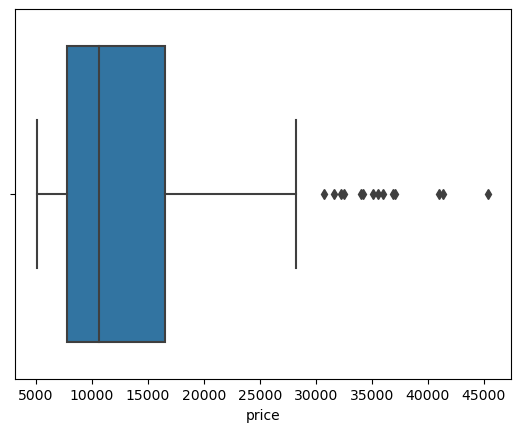

In [45]:
sns.boxplot(data=df,x=df.price)
plt.show()

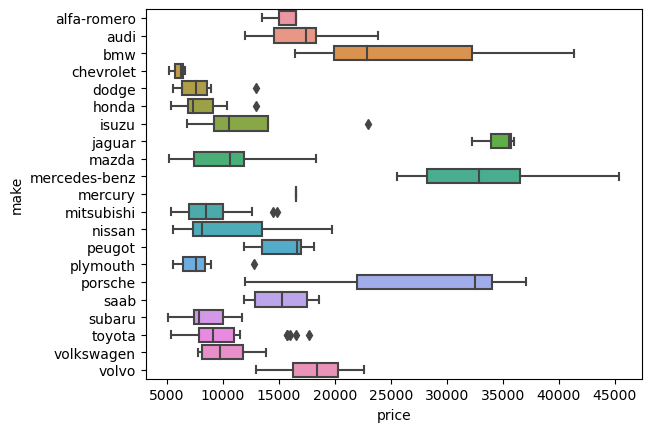

In [46]:
sns.boxplot(data=df,y='make',x='price')
plt.show()

In [47]:
df[(df['make']== 'toyota') & (df['price']>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [48]:
df.drop(index=[172,178,179,180,181],inplace=True)

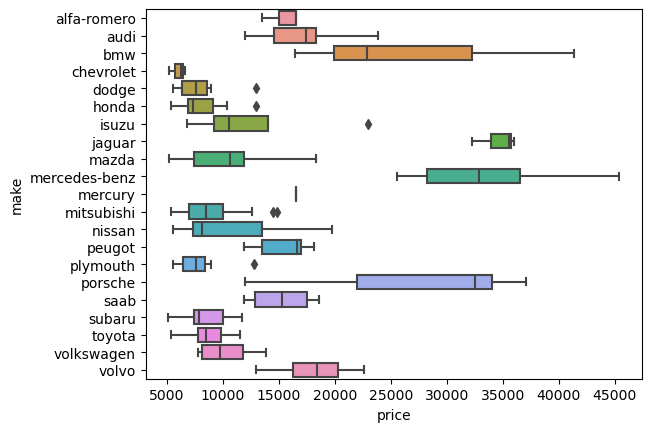

In [49]:
sns.boxplot(data=df,y='make',x='price')
plt.show()

In [50]:
df[(df['make']== 'dodge') & (df['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [51]:
df.drop(index=[29],inplace=True)

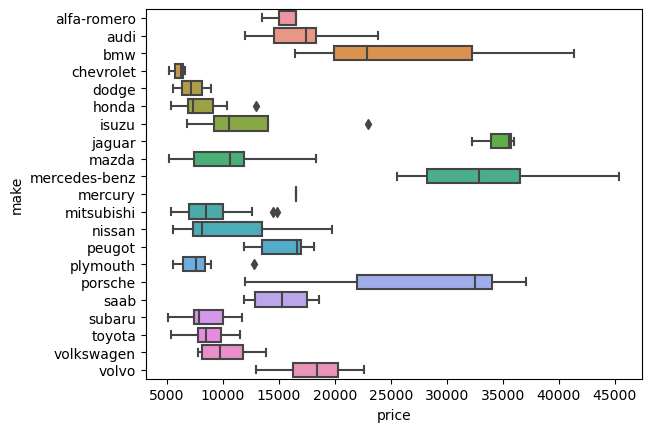

In [52]:
sns.boxplot(data=df,y='make',x='price')
plt.show()

In [53]:
df[(df['make']=='honda') & (df['price']>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [54]:
df.drop(index=[41],inplace=True)

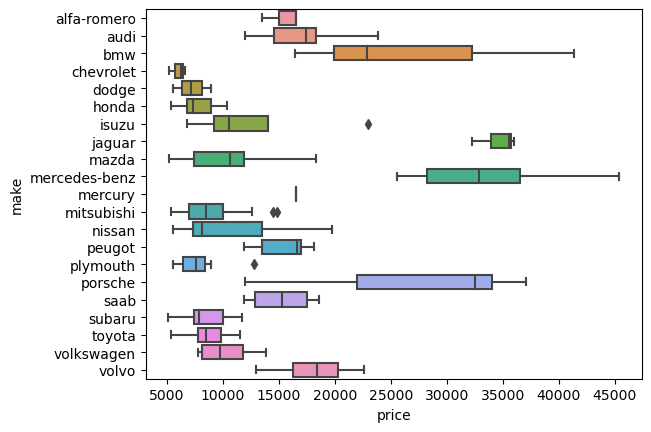

In [55]:
sns.boxplot(data=df,y='make',x='price')
plt.show()

In [56]:
df[(df['make']=='isuzu') & (df['price']>14000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [57]:
df.drop(index=[45],inplace=True)

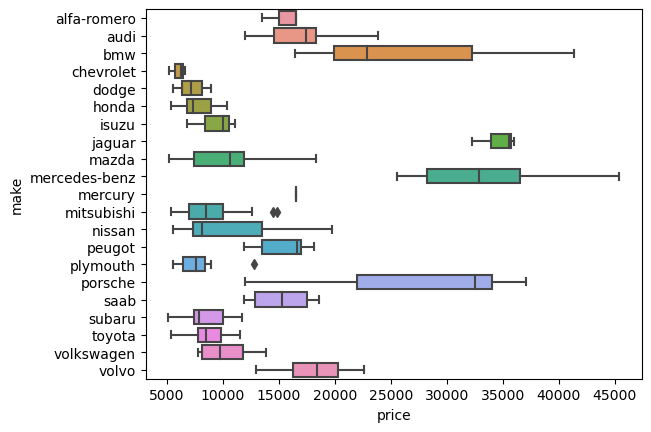

In [58]:
sns.boxplot(data=df,y='make',x='price')
plt.show()

In [59]:
df[(df['make']=='mitsubishi') & (df['price']>14000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [60]:
df.drop(index=[83,84],inplace=True)

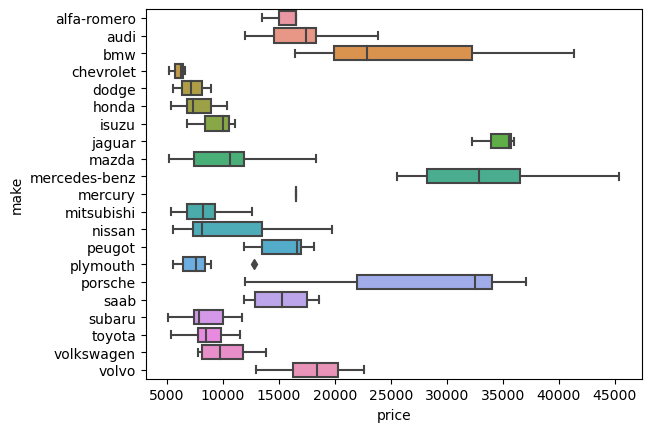

In [61]:
sns.boxplot(data=df,y='make',x='price')
plt.show()

In [62]:
df[(df['make']=='plymouth') & (df['price']>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [63]:
df.drop(index=[124],inplace=True)

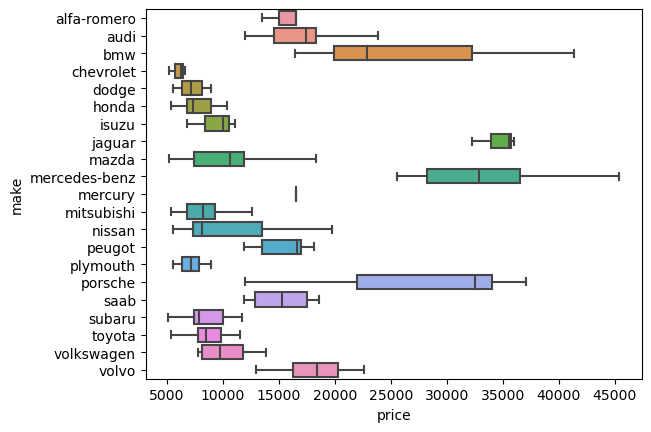

In [64]:
sns.boxplot(data=df,y='make',x='price')
plt.show()

In [65]:
df['fuel-type'].value_counts()

gas       172
diesel     20
Name: fuel-type, dtype: int64

In [66]:
df['make'].value_counts()

toyota           27
nissan           18
mazda            17
volkswagen       12
honda            12
subaru           12
volvo            11
mitsubishi       11
peugot           11
bmw               8
dodge             8
mercedes-benz     8
audi              7
saab              6
plymouth          6
porsche           5
alfa-romero       3
jaguar            3
isuzu             3
chevrolet         3
mercury           1
Name: make, dtype: int64

In [67]:
df_num = df.select_dtypes(include = ['float','int'])

In [68]:
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [69]:
df_cat =df.select_dtypes('object')

In [70]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


# one-hot-encoding

In [71]:
pd.get_dummies(df_cat['make'])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Label encoding

# import class from sklearn preprocessing

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
# creat instance or object of LabelEncoder

In [74]:
le = LabelEncoder()

# fit the model

In [75]:
le.fit_transform(df_cat['make'])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20])

In [76]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [77]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [78]:
new_df = pd.concat([df_num,df_cat],axis = 1)

In [79]:
new_df.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122.0,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,122.0,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,122.0,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,164.0,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,164.0,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


In [80]:
x=new_df[['symboling','normalized-losses','width','height','engine-size','horsepower','city-mpg','highway-mpg','make','fuel-type','body-style','drive-wheels','engine-location','engine-type']]

In [81]:
y=new_df['price']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [84]:
xtest.size,ytest.size

(546, 39)

In [85]:
xtrain.size,ytrain.size

(2142, 153)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr =LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [88]:
from sklearn.metrics import r2_score

In [89]:
r2_score(ytest,ypred)

0.8311474406475985

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [91]:
mean_absolute_error(ytest,ypred)

2840.7290492179854